In [1]:
import math
import os
import pathlib
import shutil

from astropy import units as u
from matplotlib import pyplot as plt
from neclib import config
from neclib.core import Parameters
from scipy import optimize
import cv2
import numpy as np
import pandas as pd

2024-05-29 08:53:48,045: [INFO: configuration.py#L230] Importing configuration from '/Users/takutoito/.necst/config.toml'


In [2]:
# date = pathlib.Path(os.getcwd()).name  # e.g. "20201111_144501"

In [3]:
# Get ``pointing_param_path`` from ``config``.
# data_dir = f"/Users/r.yamada/nercst/data/20231220_opticalpointing/metas/"
# pic_dir = f"/Users/r.yamada/nercst/data/20231220_opticalpointing/pics/"
# kisa_file = f"/Users/r.yamada/nercst/data/20231220_opticalpointing/metas/necst_opticalpointing_20231218_135726/pointing_param.toml"
# figs = "/Users/r.yamada/nercST/figs/20231220_opticalpointing/1st_sequence"
# data_dir = "/home/exito/data/operation/optical_pointing/"+date+"/"
# pic_dir = "/home/exito/data/operation/optical_pointing/picture/"+date+"/"
# kisa_file = "/home/exito/ros/src/necst-1p85m2019/lib/kisa.dat"

In [4]:
date = "20240525_1"
dbname = "necst_opticalpointing_20240525_113626"

data_dir = "data" +"/" + date
pic_dir = "pics" + "/" + date +"/"
kisa_file = "data" + "/" + date + "/" + dbname + "/pointing_param.toml"
figs = "figs" + "/" + date + "/"

In [5]:
def write_param(filepath, model, a1, a2, a3, b1, b2, b3, g1, c1, c2, d1, d2, e1, e2):
    with open(filepath, mode="w") as file:
        param = (
            f'[metadata]\n'
            f'model = "{model}"\n'
            f'\n'
            f'[pointing_params]\n'
            f'"a1[deg]" = {a1.to("deg").value}\n'
            f'"a2[deg]" = {a2.to("deg").value}\n'
            f'"a3[deg]" = {a3.to("deg").value}\n'
            f'"b1[deg]" = {b1.to("deg").value}\n'
            f'"b2[deg]" = {b2.to("deg").value}\n'
            f'"b3[deg]" = {b3.to("deg").value}\n'
            f'g1 = {g1}\n'
            f'"c1[deg]" = {c1.to("deg").value}\n'
            f'"c2[deg]" = {c2.to("deg").value}\n'
            f'"d1[deg]" = {d1.to("deg").value}\n'
            f'"d2[deg]" = {d2.to("deg").value}\n'
            f'"e1[deg]" = {e1.to("deg").value}\n'
            f'"e2[deg]" = {e2.to("deg").value}\n'
        )
        file.write(param)

In [6]:
param_before = Parameters.from_file(kisa_file)
def apply_kisa():
        if param_before.model != "omu1p85m":
                raise NotImplementedError(f"This analysis is only for model omu1p85m, not {param_before.model}.")
        # fkisa = open(kisa_file,"r")
        # kisa = fkisa.readlines()
        param_delta = Parameters.from_file(f"{data_dir}/pointing_param_delta.toml")
        # fdkisa = open(f"{data_dir}/pointing_param_delta", "r")
        # dkisa = fdkisa.readlines()
        a1 = param_before.a1 + param_delta.a1
        a2 = param_before.a2 + param_delta.a2
        a3 = param_before.a3 + param_delta.a3
        b1 = param_before.b1 + param_delta.b1
        b2 = param_before.b2 + param_delta.b2
        b3 = param_before.b3 + param_delta.b3
        g1 = param_before.g1 + param_delta.g1
        c1 = param_before.c1
        c2 = param_before.c2
        d1 = param_before.d1
        d2 = param_before.d2
        e1 = param_before.e1
        e2 = param_before.e2
        # fkisa.close()

        # old_kisa_file = f"{data_dir}/pointing_param_before.toml"
        # shutil.copy(kisa_file, old_kisa_file)
        # print("``pointing_param_before.toml`` was created.")

        write_param(f"{data_dir}/pointing_param_after.toml", param_before.model, a1, a2, a3, b1, b2, b3, g1, c1, c2, d1, d2, e1, e2)
        # nkisa = open(kisa_file,"w")
        # param_new = (f'[metadata]\n'
        #              f'model = "{param.model}"\n'
        #              f'\n'
        #              f'[pointing_params]\n'
        #              f'"a1[deg]" = {a1.to("deg").value}\n'
        #              f'"a2[deg]" = {a2.to("deg").value}\n'
        #              f'"a3[deg]" = {a3.to("deg").value}\n'
        #              f'"b1[deg]" = {b1.to("deg").value}\n'
        #              f'"b2[deg]" = {b2.to("deg").value}\n'
        #              f'"b3[deg]" = {b3.to("deg").value}\n'
        #              f'g1 = {g1}\n'
        #              f'"c1[deg]" = {c1.to("deg").value}\n'
        #              f'"c2[deg]" = {c2.to("deg").value}\n'
        #              f'"d1[deg]" = {d1.to("deg").value}\n'
        #              f'"d2[deg]" = {d2.to("deg").value}\n'
        #              f'"e1[deg]" = {e1.to("deg").value}\n'
        #              f'"e2[deg]" = {e2.to("deg").value}\n')
        # nkisa.write(param_new)
        # nkisa.write(str(a1)+"\n")
        # nkisa.write(str(a2)+"\n")
        # nkisa.write(str(a3)+"\n")
        # nkisa.write(str(b1)+"\n")
        # nkisa.write(str(b2)+"\n")
        # nkisa.write(str(b3)+"\n")
        # nkisa.write(str(g1)+"\n")
        # nkisa.write(str(c1)+"\n")
        # nkisa.write(str(c2)+"\n")
        # nkisa.write(str(d1)+"\n")
        # nkisa.write(str(d2)+"\n")    
        # nkisa.write(str(e1)+"\n")
        # nkisa.write(str(e2)+"\n")
        # nkisa.close()

        # new_kisa_file = data_dir + "pointing_param_after.toml"
      #  shutil.copy(f"{data_dir}/pointing_param_after.toml", kisa_file)
       # print("``pointing_param_after.toml`` was created and pointing_param was updated.")
       # print("Data location : " + data_dir)
       # print("======= ``pointing_param_delta.toml`` =======")
       # print(param_delta)
        # print(a1)
        # print(a2)
        # print(a3)
        # print(b1)
        # print(b2)
        # print(b3)
        # print(g1)
        # print(c1)
        # print(c2)
        # print(d1)
        # print(d2)
        # print(e1)
        # print(e2)

In [7]:
def scatter_plot(x, y, xlabel, ylabel,d_rms):
    plt.figure()
    plt.scatter(x, y, s=5)
    if xlabel[0] == 'dAz' and ylabel[0] == 'dEl' or xlabel[0] == 'zansa_dAz' and ylabel[0] == 'zansa_dEl':
        plt.title('%s_vs_%s\nrms = %0.2f[arcsec]'%(xlabel[0], ylabel[0], d_rms))
        plt.axes().set_aspect('equal', 'datalim')
        X, Y = [], []
        for num in np.linspace(-180,180,360):
            r = 5. #[arcsec]
            X.append(r * math.sin(math.radians(num)))
            Y.append(r * math.cos(math.radians(num)))
        plt.plot(X, Y,"r")
    elif xlabel[0] == 'Az' and ylabel[0] == 'El':
        plt.title('%s_vs_%s'%(xlabel[0], ylabel[0]))

    elif xlabel[0] == 'Az':
        plt.title('%s_vs_%s'%(xlabel[0], ylabel[0]))

    elif xlabel[0] == 'El':
        plt.title('%s_vs_%s'%(xlabel[0], ylabel[0]))

    else:
        print('use correct label name')

    plt.xlabel('%s [%s]'%xlabel)
    plt.ylabel('%s [%s]'%ylabel)
    plt.grid()
    plt.savefig(figs + '%s_vs_%s.png'%(xlabel[0], ylabel[0]))

In [8]:
def calc_daz_del():
    filepath = data_dir + "/necst_opticalpointing_20240525_113626_meta.csv"
    npix_x = 6000   #number of pixcels
    npix_y = 4000
    sensor_x = 22.3   #sensor size[mm]
    f = 500.   #shoten kyori[mm]

    metadata = pd.read_csv(filepath)
    fl = metadata.file
    Az = metadata.cap_az
    El = metadata.cap_el
    
   # print(fl, _Az)
    pix_x = []
    pix_y = []
    figli = []
    starp = []
    for i,fl1 in enumerate(fl):
        try:
            img = cv2.imread(pic_dir+fl1+".JPG", cv2.IMREAD_GRAYSCALE)
            print("calculated dAz dEl : "+pic_dir+fl1+".JPG")
            img = np.flipud(img)
            ret, nimg = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)  # 点源検出
            contours, hierarchy = cv2.findContours(nimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # 点源検出
            stars = []
            areas = []
            for cnt in contours:
                M = cv2.moments(cnt)
                if M['m00'] != 0:
                    cx = int(M['m10']/M['m00'])
                    cy = int(M['m01']/M['m00'])
                    stars.append(np.array([[cx,cy]], dtype='int32'))
                else:
                    stars.append(np.array([cnt[0][0]], dtype='int32'))
                areas.append(cv2.contourArea(cnt))

            areasarr = np.array(areas)
            idx = areasarr.argmax()
            plt.imshow(np.flipud(cv2.imread(pic_dir+fl1+".JPG")), vmin=0, vmax=256)
            plt.xlim(0, npix_x)
            plt.ylim(0, npix_y)
            plt.plot(stars[idx][0][0], stars[idx][0][1], marker='+', ms=8, alpha=0.7, color="red", mew=0.2)
            plt.title("Az : "+str(Az[i])+" EL : "+str(El[i]))
            plt.savefig(figs+fl1+'.mark.png', dpi=300)
            plt.show()
            plt.close()
            pix_x.append(stars[idx][0][0])
            pix_y.append(stars[idx][0][1])
        except:
            pix_x.append(np.nan)
            pix_y.append(np.nan)
            print("ERROR : can not find star position")
            print(fl1)
    

    pix = np.array([pix_x, pix_y]).T

    dpix_x = (pix[:,0] - npix_x//2)
    dpix_y = (pix[:,1] - npix_y//2)

    theta_x = 2 * np.degrees(np.arctan(sensor_x / (2*f)))   #[degree]

    theta_x_pix = (theta_x / npix_x) * 3600.   #[arcsec]

    #---pixcel --> pix_x_to_arcsec
    d_x = dpix_x * theta_x_pix   #[arcsec]
    d_y = dpix_y * theta_x_pix   #[arcsec]

    d_x_sigma = np.nanstd(d_x)
    d_y_sigma = np.nanstd(d_y)

    d_x_rms = np.sqrt(np.nansum(d_x**2)/len(d_x))
    d_y_rms = np.sqrt(np.nansum(d_y**2)/len(d_y))

    d_rms = np.sqrt(d_x_rms**2 + d_y_rms**2)
    d_sigma = np.sqrt(d_x_sigma**2 + d_y_sigma**2)

    print('rms = %0.2f [arcsec]'%d_rms)
    print('sigma = %0.2f [arcsec]'%d_sigma)

    p_array = np.array([Az, El, d_x, d_y]).T
    np.savetxt(data_dir + 'Az_El_dAz_dEl.dat', p_array, delimiter=', ')
    scatter_plot(Az, El, ('Az', 'degree'), ('El', 'degree'), d_rms)
    scatter_plot(Az, d_x, ('Az', 'degree'), ('dAz', 'arcsec'), d_rms)
    scatter_plot(Az, d_y, ('Az', 'degree'), ('dEl', 'arcsec'), d_rms)
    scatter_plot(El, d_x, ('El', 'degree'), ('dAz', 'arcsec'), d_rms)
    scatter_plot(El, d_y, ('El', 'degree'), ('dEl', 'arcsec'), d_rms)
    scatter_plot(d_x, d_y, ('dAz', 'arcsec'), ('dEl', 'arcsec'), d_rms)
    
    return np.array([(_az, _el, _dx, _dy) for _az, _el, _dx, _dy in zip(Az, El, d_x, d_y)], dtype=[('az', float), ('el', float), ('dx', float), ('dy', float)])


calculated dAz dEl : pics/20240525_1/20240525_113636No0.JPG


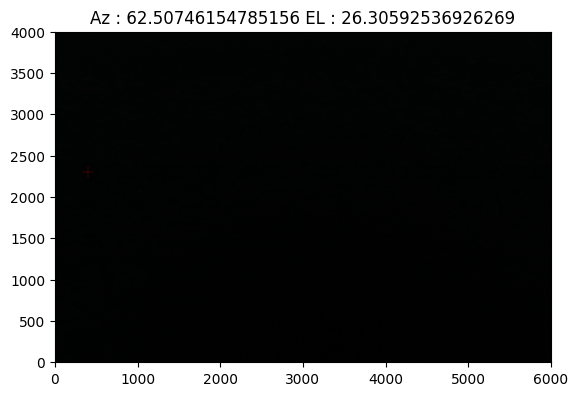

calculated dAz dEl : pics/20240525_1/20240525_113636No1.JPG


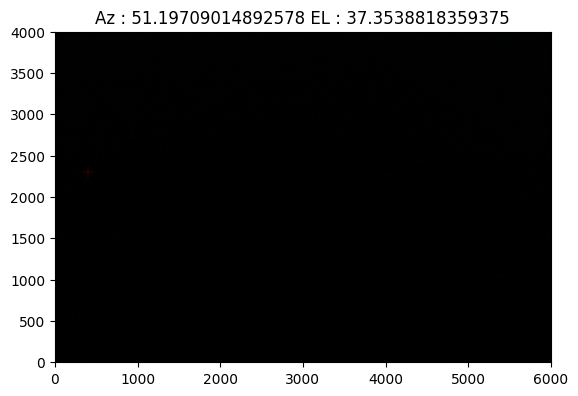

calculated dAz dEl : pics/20240525_1/20240525_113636No2.JPG


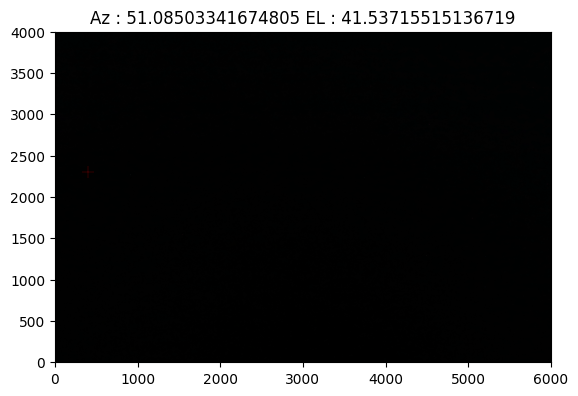

calculated dAz dEl : pics/20240525_1/20240525_113636No3.JPG


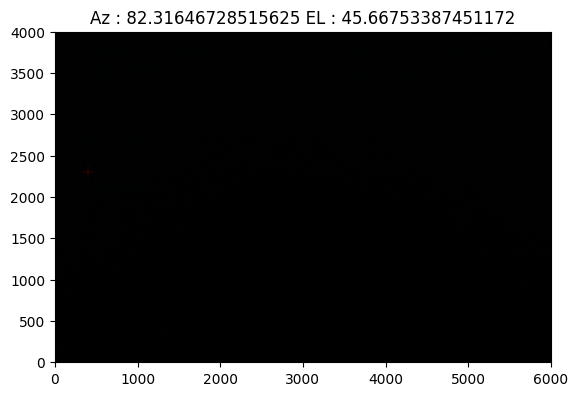

calculated dAz dEl : pics/20240525_1/20240525_113636No4.JPG


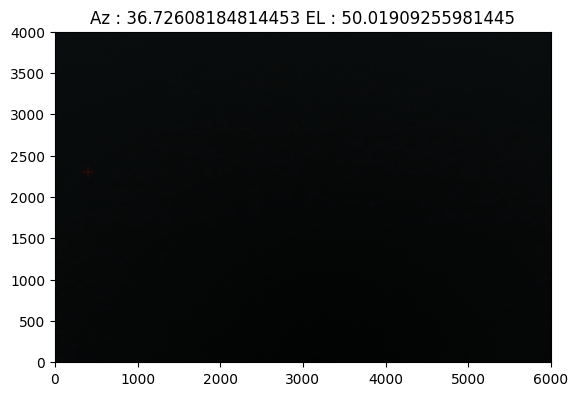

calculated dAz dEl : pics/20240525_1/20240525_113636No5.JPG


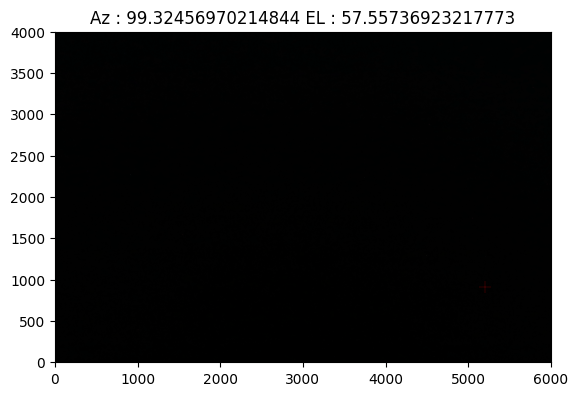

calculated dAz dEl : pics/20240525_1/20240525_113636No6.JPG


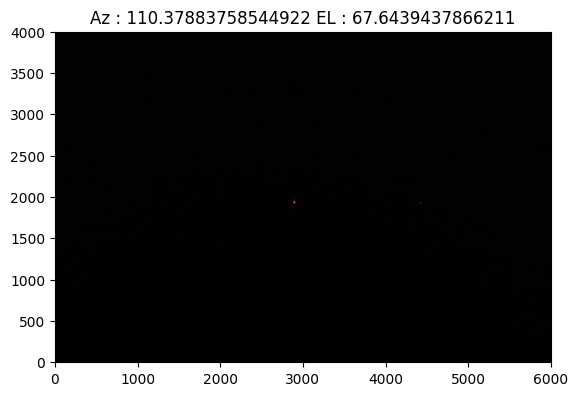

calculated dAz dEl : pics/20240525_1/20240525_113636No7.JPG


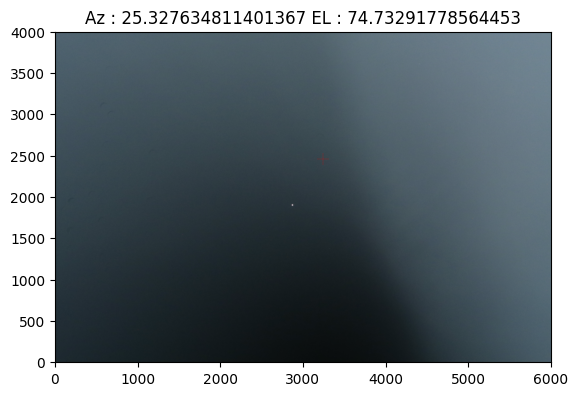

calculated dAz dEl : pics/20240525_1/20240525_113636No8.JPG


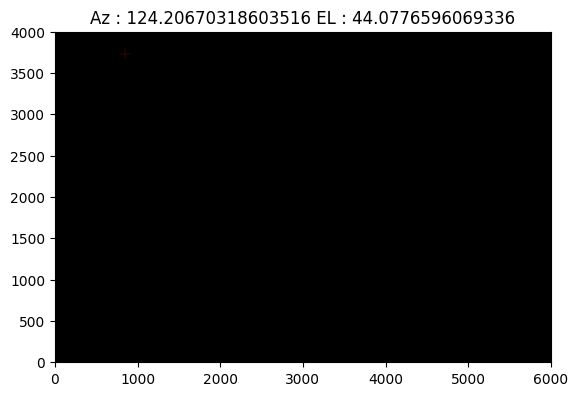

calculated dAz dEl : pics/20240525_1/20240525_113636No9.JPG


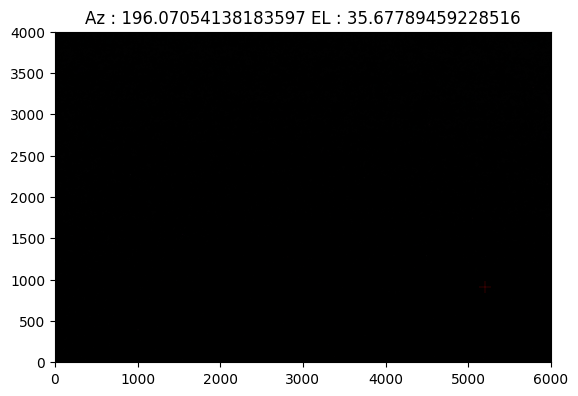

calculated dAz dEl : pics/20240525_1/20240525_113636No10.JPG


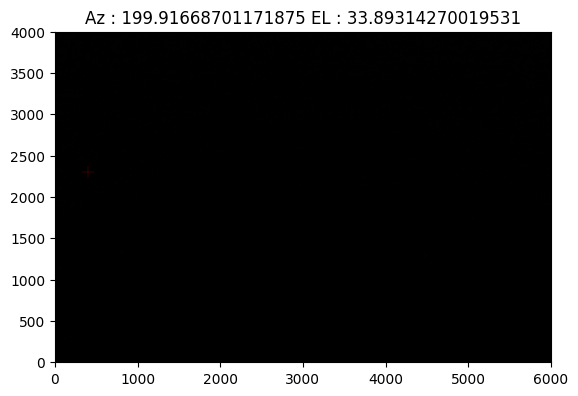

calculated dAz dEl : pics/20240525_1/20240525_113636No11.JPG


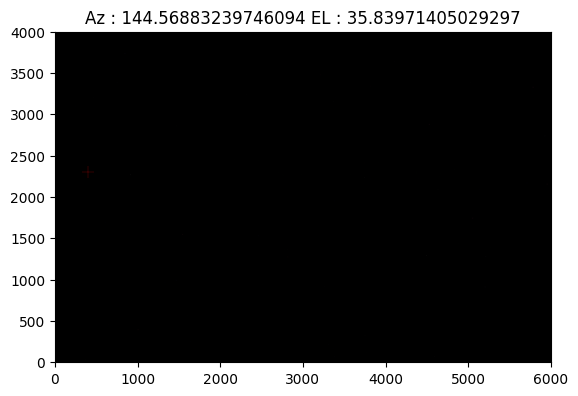

calculated dAz dEl : pics/20240525_1/20240525_113636No12.JPG


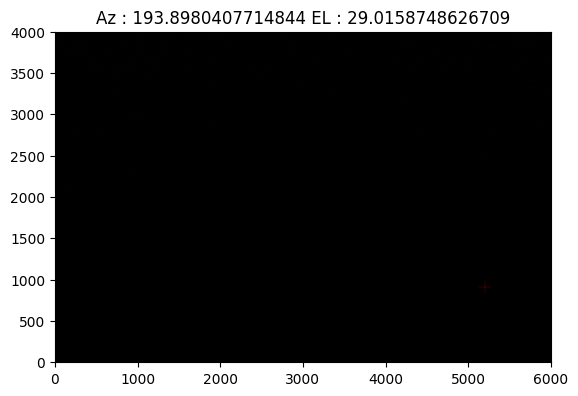

calculated dAz dEl : pics/20240525_1/20240525_113636No13.JPG


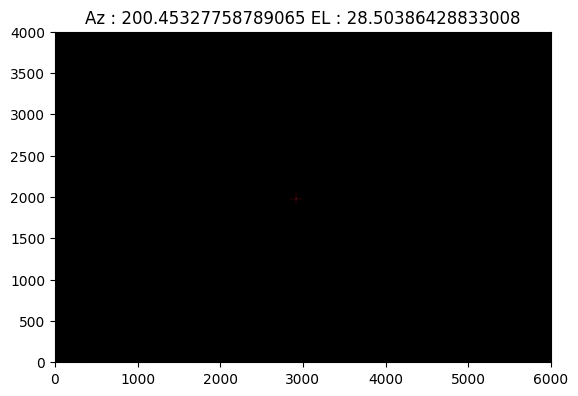

calculated dAz dEl : pics/20240525_1/20240525_113636No14.JPG


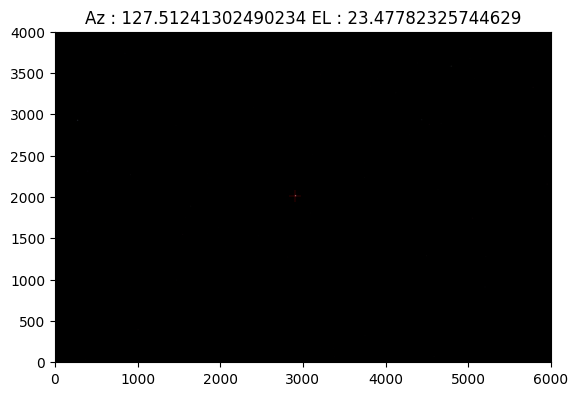

calculated dAz dEl : pics/20240525_1/20240525_113636No15.JPG


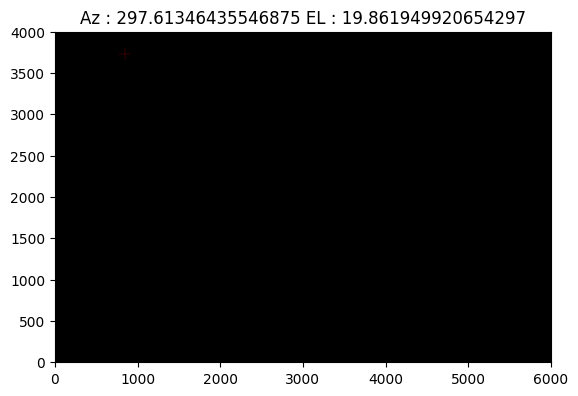

calculated dAz dEl : pics/20240525_1/20240525_113636No16.JPG


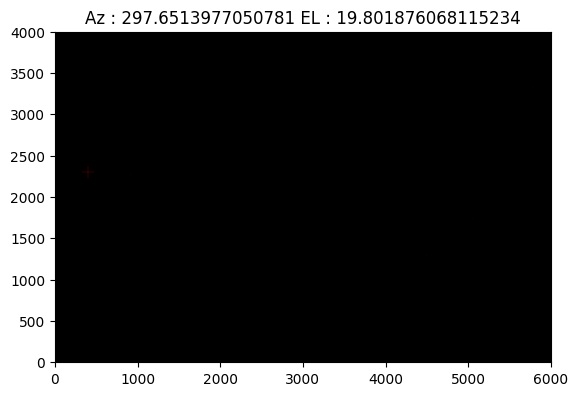

calculated dAz dEl : pics/20240525_1/20240525_113636No17.JPG


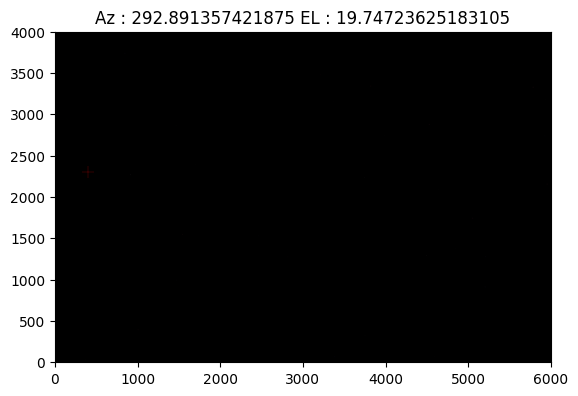

calculated dAz dEl : pics/20240525_1/20240525_113636No18.JPG


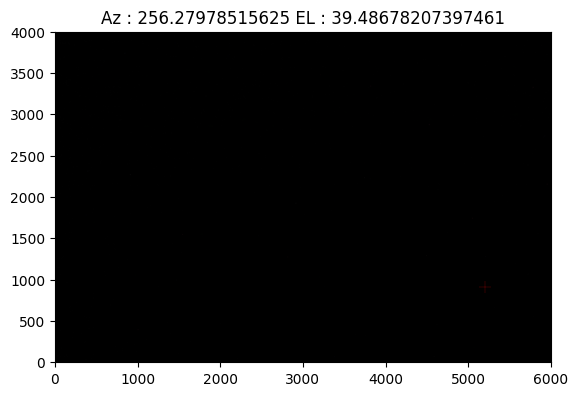

calculated dAz dEl : pics/20240525_1/20240525_113636No19.JPG


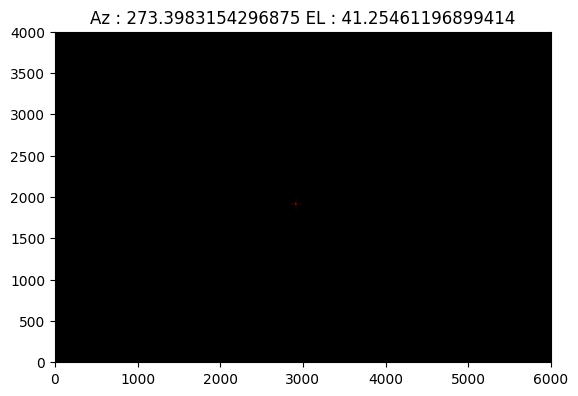

calculated dAz dEl : pics/20240525_1/20240525_113636No20.JPG


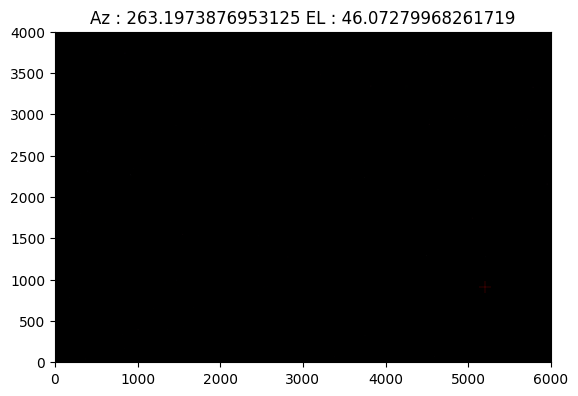

calculated dAz dEl : pics/20240525_1/20240525_113636No21.JPG


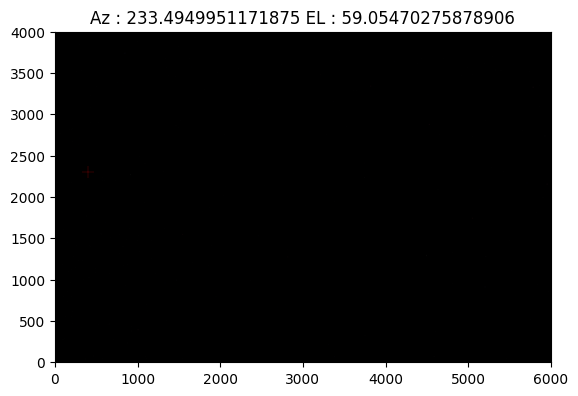

calculated dAz dEl : pics/20240525_1/20240525_113636No22.JPG


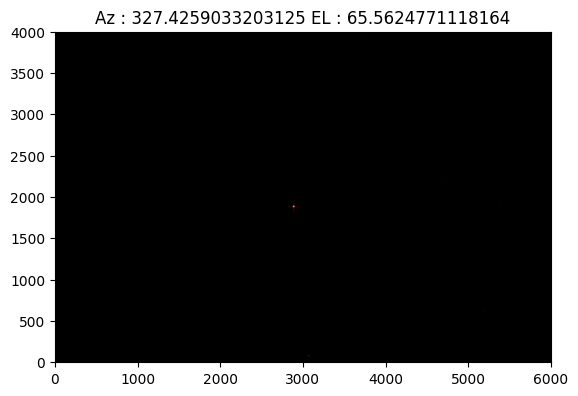

calculated dAz dEl : pics/20240525_1/20240525_113636No23.JPG


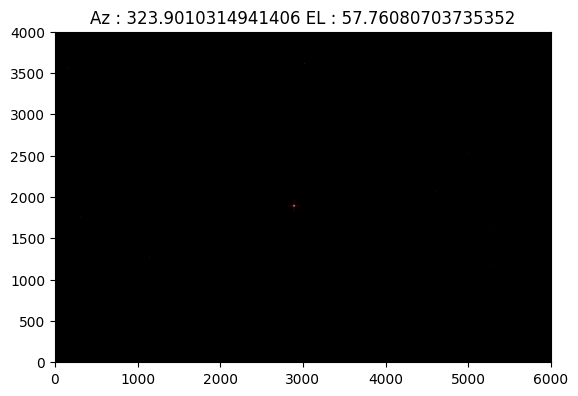

calculated dAz dEl : pics/20240525_1/20240525_113636No24.JPG


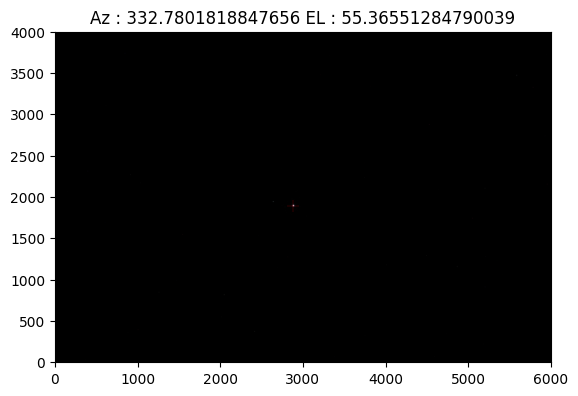

rms = 3282.75 [arcsec]
sigma = 3049.51 [arcsec]


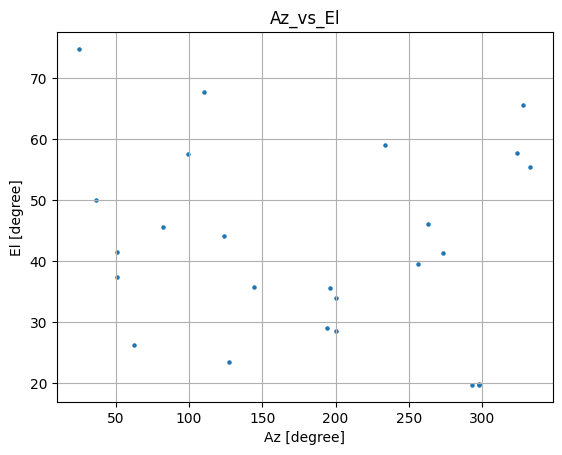

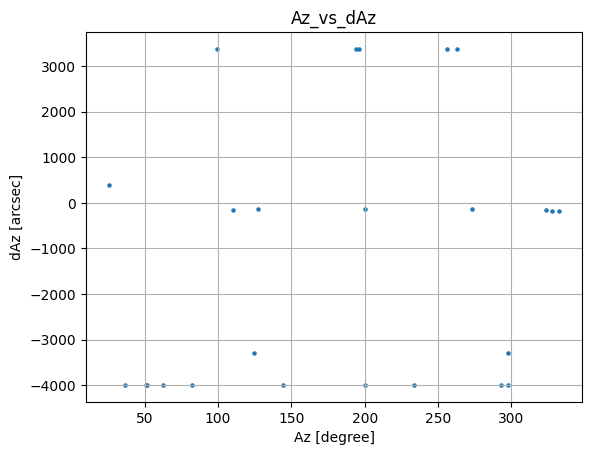

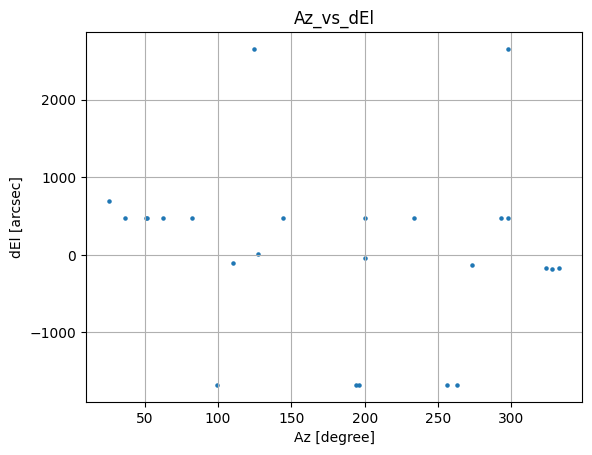

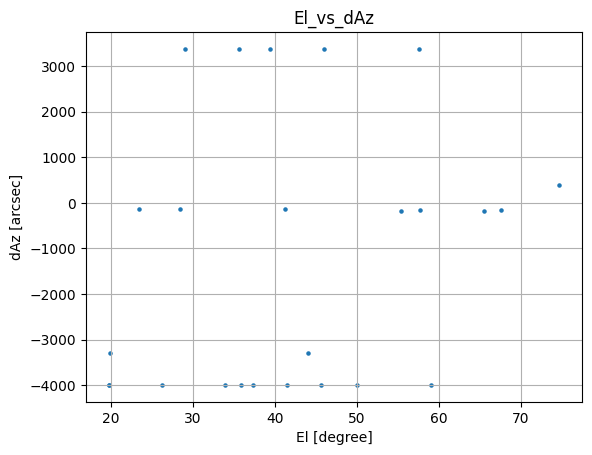

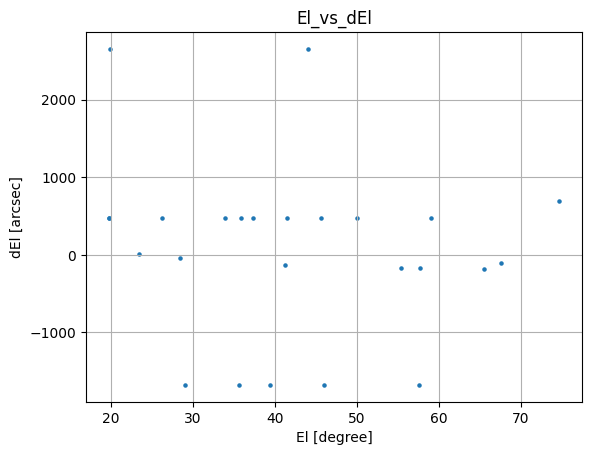

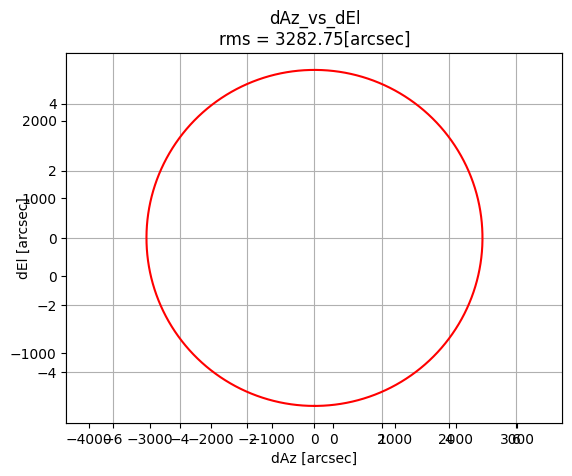

In [9]:
results = calc_daz_del()

In [10]:
results

array([( 62.50746155, 26.30592537, -3991.88247562,   470.6251613 ),
       ( 51.19709015, 37.35388184, -3991.88247562,   469.09218032),
       ( 51.08503342, 41.53715515, -3991.88247562,   469.09218032),
       ( 82.31646729, 45.66753387, -3991.88247562,   470.6251613 ),
       ( 36.72608185, 50.01909256, -3991.88247562,   470.6251613 ),
       ( 99.3245697 , 57.55736923,  3375.62412109, -1675.54821269),
       (110.37883759, 67.64394379,  -162.49598403,  -108.84164968),
       ( 25.32763481, 74.73291779,   381.71226437,   694.44038458),
       (124.20670319, 44.07765961, -3302.04103398,  2653.59007884),
       (196.07054138, 35.67789459,  3375.62412109, -1677.08119368),
       (199.91668701, 33.8931427 , -3991.88247562,   470.6251613 ),
       (144.5688324 , 35.83971405, -3991.88247562,   469.09218032),
       (193.89804077, 29.01587486,  3375.62412109, -1677.08119368),
       (200.45327759, 28.50386429,  -125.70444048,   -39.85750552),
       (127.51241302, 23.47782326,  -137.9682883

In [11]:
len(results)

25

In [12]:
# いらない点を除去
bad_data_mask1 = abs(results['dy']) < 500
bad_data_mask2 = abs(results['dx']) < 500
bad_data_mask1
#bad_data_mask = results['dy'] <1000 
#

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True])

In [13]:
results2 = results[bad_data_mask1]
bad_data_mask2 = abs(results2['dx']) < 500
results2 = results2[bad_data_mask2]

In [14]:
len(results2)

7

In [15]:
dx_sigma = np.nanstd(results2['dx'])
dy_sigma = np.nanstd(results2['dy'])
d_sigma = np.sqrt(dx_sigma**2 + dy_sigma**2)

print('sigma = %0.2f [arcsec]'%d_sigma)


sigma = 71.61 [arcsec]


In [16]:
def f_az2(X, a1, a2, a3, b1, b2, b3, g1):
    Az, El = X
    return np.cos(El*(np.pi/180.))*((a1 * np.tan(El*(np.pi/180.))) + (a2 / np.cos(El*(np.pi/180.))) + a3 + ((b1 * np.sin(Az*(np.pi/180.)) * np.sin(El*(np.pi/180.)) - b2 * np.cos(Az*(np.pi/180.)) * np.sin(El*(np.pi/180.))) / np.cos(El*(np.pi/180.))))

def f_el2(X, a1, a2, a3, b1, b2, b3, g1):
    Az, El = X
    return (b1 * np.cos(Az*(np.pi/180.))) + (b2 * np.sin(Az*(np.pi/180.))) + b3 + (g1 * El)

def eval_func(p, az, el, dx, dy):
    results_dx = f_az2([az, el], *p)
    return (dx - results_dx)**2 

def eval_func2(p, az, el, dx, dy):
    results_dy = f_el2([az, el],*p)
    return (dy - results_dy)**2 

def eval_func3(p, az, el, dx, dy):
    results_dx = f_az2([az, el], *p)
    results_dy = f_el2([az, el], *p)
    return (dx - results_dx)**2 + (dy- results_dy)**2

In [17]:
pp1 = optimize.least_squares(eval_func, x0=[0,0,0,0,0,0,0], args=(results2['az'], results2['el'], results2['dx'], results2['dy'], ))
pp2 = optimize.least_squares(eval_func2, x0=[0,0,0,0,0,0,0], args=(results2['az'], results2['el'], results2['dx'], results2['dy'], ))

In [18]:
pp = list(pp1.x[0:3])+list(pp2.x[3:7])

In [19]:
pp3 = optimize.least_squares(eval_func3, x0=pp, args=(results2['az'], results2['el'], results2['dx'], results2['dy'], ))

In [20]:
pp3.x

array([-76.07913874, -62.38367072, -53.16739373, -25.99161656,
        41.83108845,  18.10032753,  -2.51365536])

In [21]:
pp3.x/3600

array([-0.02113309, -0.0173288 , -0.01476872, -0.00721989,  0.01161975,
        0.00502787, -0.00069824])

In [22]:
bestfit_dx = f_az2([results2['az'],results2['el']], *pp3.x)
bestfit_dy = f_el2([results2['az'],results2['el']], *pp3.x)

In [23]:
error_dx = results2['dx'] - bestfit_dx
error_dy = results2['dy'] - bestfit_dy

bestfit_dx_sigma = np.nanstd(error_dx)
bestfit_dy_sigma = np.nanstd(error_dy)
bestfit_d_sigma = np.sqrt(bestfit_dx_sigma**2 + bestfit_dy_sigma**2)

print('bestfit_sigma = %0.2f [arcsec]'%bestfit_d_sigma)

bestfit_sigma = 5.47 [arcsec]


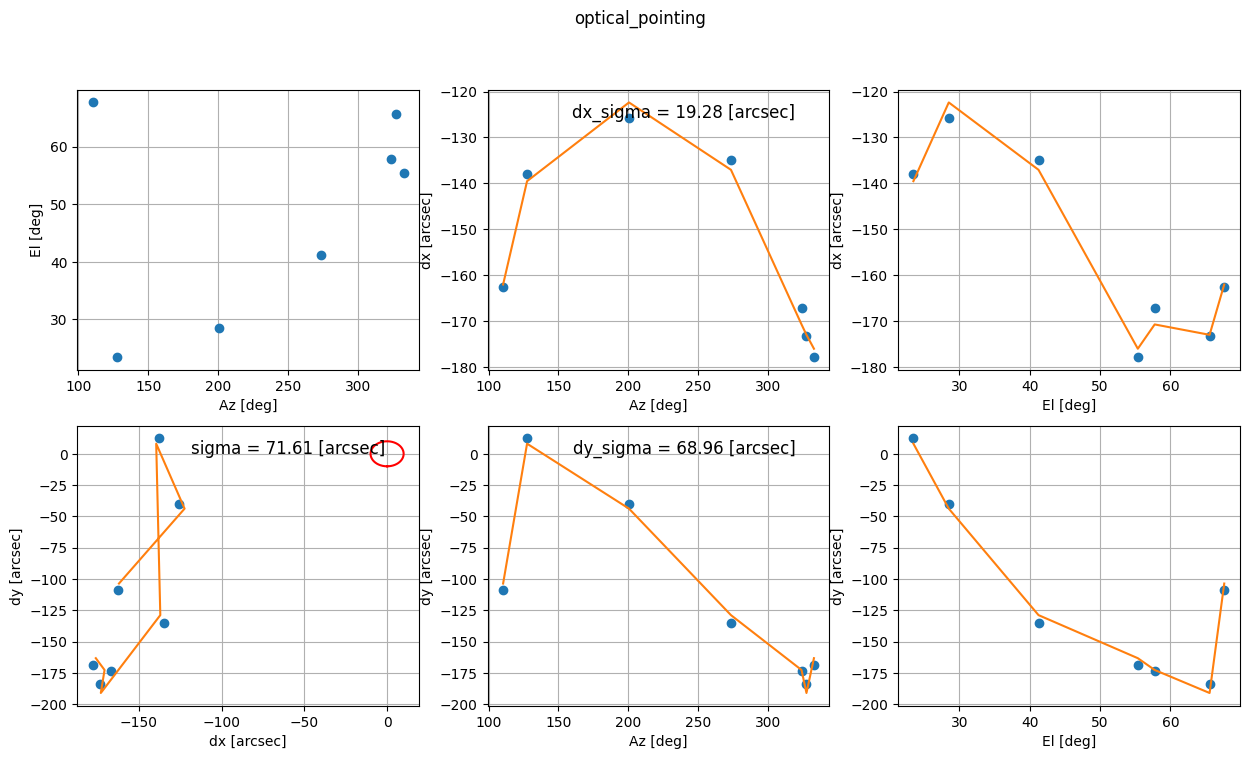

In [24]:
fig = plt.figure(figsize=[15,8])
ax = [fig.add_subplot(2,3,i) for i in range(1,7)]

ax[0].plot(results2['az'], results2['el'], 'o')
ax[0].set_xlabel('Az [deg]')
ax[0].set_ylabel('El [deg]')

ax[1].plot(results2['az'], results2['dx'], 'o')
ind1=np.argsort(results2['az'])
ax[1].plot(results2['az'][ind1], bestfit_dx[ind1], '-')
ax[1].set_xlabel('Az [deg]')
ax[1].set_ylabel('dx [arcsec]')
ax[1].text(0.9, 0.95, 'dx_sigma = %0.2f [arcsec]'%dx_sigma, size=12, ha='right', va='top', transform=ax[1].transAxes,)

ax[2].plot(results2['el'], results2['dx'], 'o')
ind2=np.argsort(results2['el'])
ax[2].plot(results2['el'][ind2], bestfit_dx[ind2], '-')
ax[2].set_xlabel('El [deg]')
ax[2].set_ylabel('dx [arcsec]')

ax[3].plot(results2['dx'], results2['dy'], 'o')
ax[3].plot(bestfit_dx, bestfit_dy, '-')
ax[3].set_xlabel('dx [arcsec]')
ax[3].set_ylabel('dy [arcsec]')
ax[3].text(0.9, 0.95, 'sigma = %0.2f [arcsec]'%d_sigma, size=12, ha='right', va='top', transform=ax[3].transAxes,)

X, Y = [], []
for num in np.linspace(-180,180,360):
    r = 10. #[arcsec]
    X.append(r * math.sin(math.radians(num)))
    Y.append(r * math.cos(math.radians(num)))
ax[3].plot(X, Y,"r")

ax[4].plot(results2['az'], results2['dy'], 'o')
ax[4].plot(results2['az'][ind1], bestfit_dy[ind1], '-')
ax[4].set_xlabel('Az [deg]')
ax[4].set_ylabel('dy [arcsec]')
ax[4].text(0.9, 0.95, 'dy_sigma = %0.2f [arcsec]'%dy_sigma, size=12, ha='right', va='top', transform=ax[4].transAxes,)

ax[5].plot(results2['el'], results2['dy'], 'o')
ax[5].plot(results2['el'][ind2], bestfit_dy[ind2], '-')
ax[5].set_xlabel('El [deg]')
ax[5].set_ylabel('dy [arcsec]')

[a.grid(True) for a in ax]

fig.suptitle("optical_pointing")
fig.savefig(figs + "optical_pointing_results" + ".png")

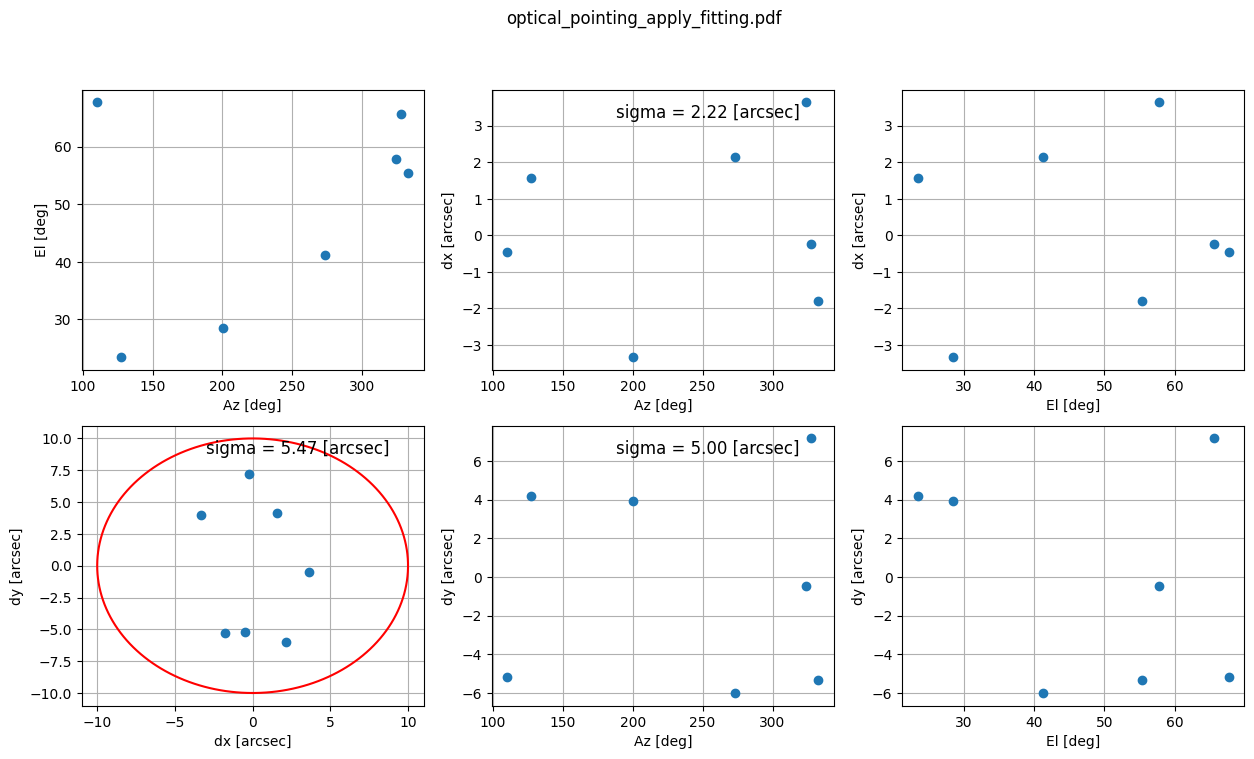

In [25]:
fig = plt.figure(figsize=[15,8])
ax = [fig.add_subplot(2,3,i) for i in range(1,7)]

ax[0].plot(results2['az'], results2['el'], 'o')
ax[0].set_xlabel('Az [deg]')
ax[0].set_ylabel('El [deg]')

ax[1].plot(results2['az'], results2['dx']-bestfit_dx, 'o')
ax[1].set_xlabel('Az [deg]')
ax[1].set_ylabel('dx [arcsec]')
ax[1].text(0.9, 0.95, 'sigma = %0.2f [arcsec]'%bestfit_dx_sigma, size=12, ha='right', va='top', transform=ax[1].transAxes,)

ax[2].plot(results2['el'], results2['dx']-bestfit_dx, 'o')
ax[2].set_xlabel('El [deg]')
ax[2].set_ylabel('dx [arcsec]')

ax[3].plot(results2['dx']-bestfit_dx, results2['dy']-bestfit_dy, 'o')
ax[3].set_xlabel('dx [arcsec]')
ax[3].set_ylabel('dy [arcsec]')
ax[3].text(0.9, 0.95, 'sigma = %0.2f [arcsec]'%bestfit_d_sigma, size=12, ha='right', va='top', transform=ax[3].transAxes,)

X, Y = [], []
for num in np.linspace(-180,180,360):
    r = 10. #[arcsec]
    X.append(r * math.sin(math.radians(num)))
    Y.append(r * math.cos(math.radians(num)))
ax[3].plot(X, Y,"r")

ax[4].plot(results2['az'], results2['dy']-bestfit_dy, 'o')
ax[4].set_xlabel('Az [deg]')
ax[4].set_ylabel('dy [arcsec]')
ax[4].text(0.9, 0.95, 'sigma = %0.2f [arcsec]'%bestfit_dy_sigma, size=12, ha='right', va='top', transform=ax[4].transAxes,)

ax[5].plot(results2['el'], results2['dy']-bestfit_dy, 'o')
ax[5].set_xlabel('El [deg]')
ax[5].set_ylabel('dy [arcsec]')

[a.grid(True) for a in ax]

fig.suptitle("optical_pointing_apply_fitting.pdf")
fig.savefig(figs + "optical_pointing_apply_fitting.pdf")

In [26]:
dkisa_array = pp3.x.T/3600
a1 = dkisa_array[0] * u.deg
a2 = dkisa_array[1] * u.deg
a3 = dkisa_array[2] * u.deg
b1 = dkisa_array[3] * u.deg
b2 = dkisa_array[4] * u.deg
b3 = dkisa_array[5] * u.deg
g1 = dkisa_array[6]
c1 = 0.0 * u.deg
c2 = 0.0 * u.deg
d1 = 0.0 * u.deg
d2 = 0.0 * u.deg
e1 = 0.0 * u.deg
e2 = 0.0 * u.deg
write_param(f"{data_dir}/pointing_param_delta.toml", param_before.model, a1, a2, a3, b1, b2, b3, g1, c1, c2, d1, d2, e1, e2)
# np.savetxt(f"{data_dir}/pointing_param_delta.toml", dkisa_array)

In [31]:
dkisa_array = pp3.x.T
a1 = dkisa_array[0] * u.deg
a2 = dkisa_array[1] * u.deg
a3 = dkisa_array[2] * u.deg
b1 = dkisa_array[3] * u.deg
b2 = dkisa_array[4] * u.deg
b3 = dkisa_array[5] * u.deg
g1 = dkisa_array[6]/3600
c1 = 0.0 * u.deg
c2 = 0.0 * u.deg
d1 = 0.0 * u.deg
d2 = 0.0 * u.deg
e1 = 0.0 * u.deg
e2 = 0.0 * u.deg
write_param(f"{data_dir}/pointing_param_delta_arcsec.toml", param_before.model, a1, a2, a3, b1, b2, b3, g1, c1, c2, d1, d2, e1, e2)
# np.savetxt(f"{data_dir}/pointing_param_delta.toml", dkisa_array)

In [28]:
np.savetxt(date+"_results2_day3.3.txt",results2)

In [29]:
apply_kisa() 

In [30]:
#np.savetxt(date+"_results2_day2.2.txt",results2)